# Power of Python and Julia for Advanced Data Analysis

Python and Julia are two powerful languages that are transforming data analysis in high-energy physics (HEP).

## Part 1: Analysis example in Python

Let's start by exploring why Python remains a go-to language for data analysis, and then pivot to Julia, which is gaining recognition for its impressive speed and suitability for scientific applications.

In [1]:
import awkward as ak

It is important to set your Python environment and install all needed Python packages first.

For example, to read data from a Parquet file you will need:
```
pip install parquet
pip install pyarrow
pip install pandas
```

In [2]:
events = ak.from_parquet("./data/SMHiggsToZZTo4L.parquet")

In [3]:
%%timeit
ak.from_parquet("./data/SMHiggsToZZTo4L.parquet")

87.3 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
muplus = events.muon[events.muon.charge > 0]
muminus = events.muon[events.muon.charge < 0]

In [5]:
%%timeit
events.muon[events.muon.charge > 0]

28.2 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
events.muon[events.muon.charge < 0]

28.3 ms ± 990 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
mu1, mu2 = ak.unzip(ak.cartesian((muplus, muminus)))

In [8]:
%%timeit
ak.unzip(ak.cartesian((muplus, muminus)))

30.3 ms ± 532 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

import vector
vector.register_awkward()

163 ms ± 6.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


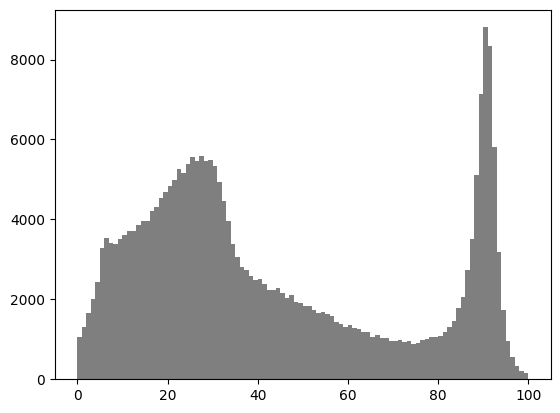

In [10]:
%%timeit
plt.hist(ak.ravel(
    
    (mu1 + mu2).mass

), bins=100, range=(0, 100));

Let's go to the next [notebook](AwkwardArray_Julia_Python-part2.ipynb).